In [1]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "double-bottom"

In [2]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.533170,434,380,474
1963,0.676364,558,267,1100
1964,0.607960,611,394,1422
1965,0.594463,730,498,1228
1966,0.472316,418,467,452
...,...,...,...,...
2018,0.488325,25744,26975,19930
2019,0.558172,28330,22425,24957
2020,0.509584,21826,21005,7786


In [3]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.533245,2815,2464,1320
1982,0.537083,3237,2790,1371
1983,0.573566,3949,2936,1665
1984,0.515346,4181,3932,2962
1985,0.581163,8503,6128,6836
1986,0.564106,8958,6922,4483
1987,0.520858,8353,7684,3626
1988,0.543290,9582,8055,7661
1989,0.591948,11160,7693,9051


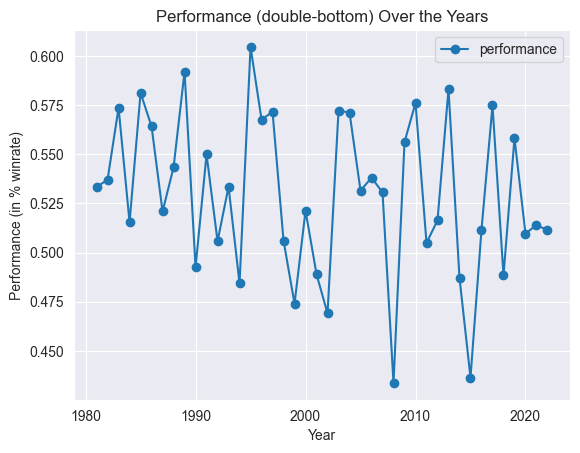

In [4]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [5]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Double Bottom YoY")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Double Bottom YoY
Slope: -0.0008
Intercept: 2.1745
R-value (correlation coefficient): -0.2473
P-value: 0.1144
Standard error: 0.0005


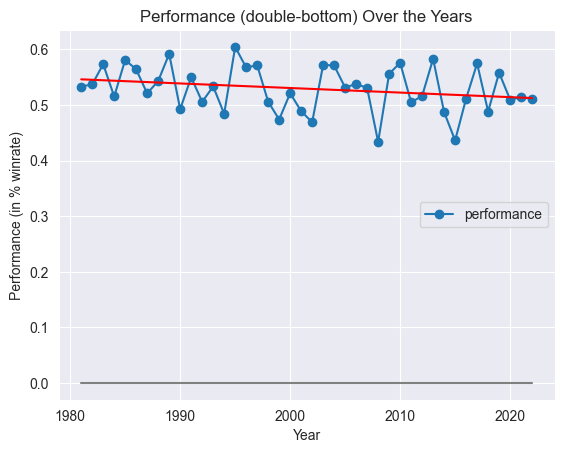

In [6]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0*years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()